In [13]:
#Задание 1. Вновь загрузите данные по опухолевым образованиям. Создайте датафрейм, добавьте целевую переменную, выведите последние пять строк датафрейма (для этого используйте функцию .tail()).
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.tail(n=5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [19]:
#Задание 2. Проведите нормализацию данных и выведите первые пять значений нормализованного набора данных.
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(cancer_df)
cancer_df_scaled = pd.DataFrame(scaled_data, columns = cancer.feature_names)

cancer_df_scaled['target'] = cancer.target
cancer_df_scaled.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [20]:
#сначала сгруппируем данные, рассчитаем среднее и транспонируем наш датафрейм
data = cancer_df_scaled.groupby('target').mean().T
data.head(2)

target,0,1
mean radius,0.947340,-0.562566
mean texture,0.538776,-0.319945


Text(0.5, 1.0, 'Распределение worst perimeter для двух типов опухолей')

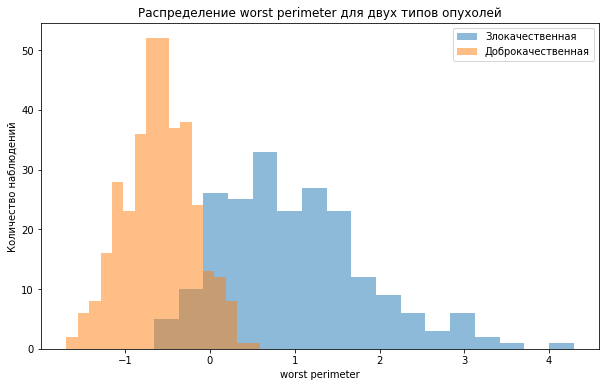

In [27]:
#Задание 3. Графически оцените распределение переменной worst perimeter для двух типов опухолей.

data['diff'] = abs(data.iloc[:, 0] - data.iloc[:, 1])
data = data.sort_values(by = ['diff'], ascending = False)

bins = 17
plt.figure(figsize = (10,6))

plt.hist(cancer_df_scaled.loc[cancer_df_scaled['target']==0, 'worst perimeter'], bins, alpha = 0.5, label = 'Злокачественная')
plt.hist(cancer_df_scaled.loc[cancer_df_scaled['target']==1, 'worst perimeter'], bins, alpha = 0.5, label = 'Доброкачественная')
plt.legend(loc = 'upper right')

plt.xlabel('worst perimeter')
plt.ylabel('Количество наблюдений')
plt.title('Распределение worst perimeter для двух типов опухолей')

In [32]:
#Задание 4. Возьмите все признаки и поместитие их в переменную X, целевую переменную поместите в переменную y.
features = list(data.index[:])

X = cancer_df_scaled[features]
y = cancer_df_scaled['target']

In [34]:
#Задание 5. Разделите данные на обучающую и тестовую части.
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.3)

In [46]:
features = list(data.index[:])

X = cancer_df_scaled[features]
y = cancer_df_scaled['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

#Задание 6. Постройте модель логистической регрессии и сделайте прогноз.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [48]:
#Задание 7. Постройте матрицу ошибок, не забудьте про подписи к строкам и столбцам. Какие выводы можно сделать?
from sklearn.metrics import confusion_matrix
model_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])

model_matrix_df = pd.DataFrame(model_matrix, columns = ['Прогноз добр.','Прогноз злок.'], index = ['Факт добр.','Факт злок.'])
model_matrix_df

,Прогноз добр.,Прогноз злок.
Факт добр.,106,2
Факт злок.,1,62


In [50]:
#Задание 8. Оцените accuracy результата вручную и с помощью модуля metrics.
#вручную
round((106+62)/(106+62+1+2),2)

0.98

In [51]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test,y_pred)
round(model_accuracy,2)

0.98